# Predicting Image Categories viewed by humans using CNN's:
## Using Artificial Neural Nets to Predict Viewed Image Categories From EEG Readings
This notebook provides a convolutional neural network (CNN) as an alternative to the linear discriminant analysis used in this study:

https://purl.stanford.edu/bq914sc3730

Open Google Drive and create a folder for your project;

After creating a folder named "major_project" , we followed the below steps:


1.   Created a folder "major_project/Datasets" and uploaded our datasets,which are .mat files, into the folder
2.   Now to access the datasets , we need to mount our Drive into this Notebook. 

---
***  Now just run each cell in the notebook using "shift+enter"***







In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
!ls  "/content/drive/My Drive/major_project/Datasets"

S10.mat  S1.mat  S2.mat  S3.mat  S4.mat  S5.mat  S6.mat  S7.mat  S8.mat  S9.mat


### Data Download

In [3]:
data_path = "/content/drive/My Drive/major_project/Datasets"
print(data_path)

/content/drive/My Drive/major_project/Datasets


### Data Exploration
There are 10 MATLAB files each corresponding to a human test subject.

In [4]:
training_path = data_path 

from scipy.io import loadmat

subjects_count = 10
subjects = []
for i in range(0, subjects_count):
    filename = "S" + str(i + 1) + ".mat"
    subjects.append(loadmat(training_path + "/" + filename))

subjects[0]

{'Fs': array([[62.5]]),
 'N': array([[32]], dtype=uint8),
 'T': array([[5188]], dtype=uint16),
 'X_2D': array([[-0.26424164, -0.47586018, -0.47061757, ...,  0.05198565,
          0.08307296, -0.04543913],
        [ 0.0028675 , -0.04133774,  0.05108967, ...,  0.09525956,
         -0.00872008,  0.12494965],
        [-0.22358645,  0.02478356,  0.08543183, ...,  0.0938575 ,
          0.06906053,  0.09690079],
        ...,
        [ 0.17795506, -0.06740315,  0.09080031, ..., -0.11675177,
         -0.19592201, -0.16641006],
        [ 0.18887348,  0.17863007,  0.32982534, ...,  0.10712342,
          0.10700955,  0.0652873 ],
        [ 0.02932549, -0.05199817, -0.15791252, ..., -0.09192452,
         -0.04275392,  0.08084101]]),
 'X_3D': array([[[-0.26424164,  0.0028675 , -0.22358645, ...,  0.17795506,
           0.18887348,  0.02932549],
         [-0.47586018, -0.04133774,  0.02478356, ..., -0.06740315,
           0.17863007, -0.05199817],
         [-0.47061757,  0.05108967,  0.08543183, ..., 

In [0]:
subjects[0]

{'Fs': array([[62.5]]),
 'N': array([[32]], dtype=uint8),
 'T': array([[5188]], dtype=uint16),
 'X_2D': array([[-0.26424164, -0.47586018, -0.47061757, ...,  0.05198565,
          0.08307296, -0.04543913],
        [ 0.0028675 , -0.04133774,  0.05108967, ...,  0.09525956,
         -0.00872008,  0.12494965],
        [-0.22358645,  0.02478356,  0.08543183, ...,  0.0938575 ,
          0.06906053,  0.09690079],
        ...,
        [ 0.17795506, -0.06740315,  0.09080031, ..., -0.11675177,
         -0.19592201, -0.16641006],
        [ 0.18887348,  0.17863007,  0.32982534, ...,  0.10712342,
          0.10700955,  0.0652873 ],
        [ 0.02932549, -0.05199817, -0.15791252, ..., -0.09192452,
         -0.04275392,  0.08084101]]),
 'X_3D': array([[[-0.26424164,  0.0028675 , -0.22358645, ...,  0.17795506,
           0.18887348,  0.02932549],
         [-0.47586018, -0.04133774,  0.02478356, ..., -0.06740315,
           0.17863007, -0.05199817],
         [-0.47061757,  0.05108967,  0.08543183, ..., 

In [0]:
subjects[1]

{'Fs': array([[62.5]]),
 'N': array([[32]], dtype=uint8),
 'T': array([[5185]], dtype=uint16),
 'X_2D': array([[ 0.02594124, -0.04524324, -0.01701071, ...,  0.01169659,
         -0.03310832, -0.07485244],
        [ 0.02749638,  0.09671534,  0.09317188, ..., -0.02063186,
          0.00472995,  0.04598656],
        [-0.08341283, -0.25350933, -0.12677028, ...,  0.08070919,
         -0.05611384,  0.09883921],
        ...,
        [-0.04913036, -0.04206025, -0.07833722, ..., -0.05829067,
         -0.01969758,  0.0081671 ],
        [-0.01943248, -0.06647573, -0.07592881, ...,  0.01235988,
         -0.01599885, -0.0336721 ],
        [-0.02853111, -0.02187377, -0.08876887, ...,  0.06035039,
          0.09775935,  0.03291255]]),
 'X_3D': array([[[ 0.02594124,  0.02749638, -0.08341283, ..., -0.04913036,
          -0.01943248, -0.02853111],
         [-0.04524324,  0.09671534, -0.25350933, ..., -0.04206025,
          -0.06647573, -0.02187377],
         [-0.01701071,  0.09317188, -0.12677028, ..., 

The README file found in the link above provides the data dictionary. Looking at the data for the first test subject above:
* sampling frequency 'Fs' was 62.5 Hz
* number of time samples 'N' per trial was 32, so each trial lasted (32 samples) / (62.5 samples per second) == 0.512 seconds
* number of trials 'T' was 5188
* X is the EEG data
* 'categoryLabels' are the numbers corresponding to which type of image the test subject looked at for each trial

Let's inspect the EEG data for the first trial of the first subject:

In [5]:
trial1_2D = subjects[0]['X_2D'][0]
trial1_3D = subjects[0]['X_3D'][0]
print("Shape of 2D EEG array =",trial1_2D.shape,"\nShape of 3D EEG array =",trial1_3D.shape)
print("2D array values :",trial1_2D,"\n3D array values :",trial1_3D)

Shape of 2D EEG array = (3968,) 
Shape of 3D EEG array = (32, 5188)
2D array values : [-0.26424164 -0.47586018 -0.47061757 ...  0.05198565  0.08307296
 -0.04543913] 
3D array values : [[-0.26424164  0.0028675  -0.22358645 ...  0.17795506  0.18887348
   0.02932549]
 [-0.47586018 -0.04133774  0.02478356 ... -0.06740315  0.17863007
  -0.05199817]
 [-0.47061757  0.05108967  0.08543183 ...  0.09080031  0.32982534
  -0.15791252]
 ...
 [ 0.26171026  0.14618344  0.13419194 ... -0.06100181 -0.02166311
   0.15729509]
 [ 0.01664864  0.31495295  0.09732464 ... -0.22246297 -0.08866313
  -0.03365586]
 [ 0.12796299  0.19186635  0.00895164 ... -0.22968245 -0.05580644
   0.03110747]]


The EEG device had 124 different electrodes surrounding the person's head. And each electrode took 32 samples, so 124 * 32 == 3968, which matches the shape of the trial1_2D variable as seen above.

Text(0.5, 1.0, ' 2-Dimensional EEG Reading : Electrode 1, Trial 1, Subject 1')

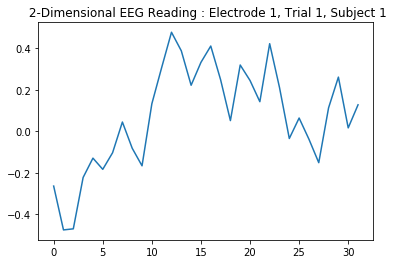

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt

N = 32
plt.plot(trial1_2D[:N])
plt.title(" 2-Dimensional EEG Reading : Electrode 1, Trial 1, Subject 1")

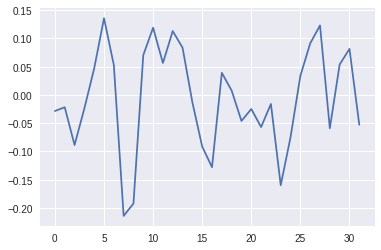

In [0]:
trial1_2D = subjects[1]['X_2D'][-1]

N = 32
plt.plot(trial1_2D[:N])
#plt.title(" 2-Dimensional EEG Reading : Electrode 1, Trial 1, Subject 1")

Text(0.5, 1.0, ' 3-Dimensional EEG Reading : Electrode 1, Trial 1, Subject 1')

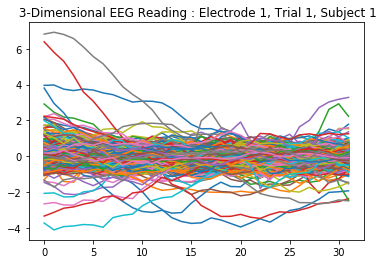

In [7]:
plt.plot(trial1_3D[:N])
plt.title(" 3-Dimensional EEG Reading : Electrode 1, Trial 1, Subject 1")

#### Imagine each trial as a 32 x 124 heatmap image
Might a CNN detect patterns in the images of each trial to correctly categorize them?

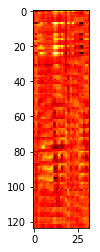

In [8]:
import numpy as np

electrodes = 124
trial_image = np.reshape(trial1_2D, (electrodes, N))
plt.imshow(trial_image, cmap='hot', interpolation='nearest')

### Data Preparation

Concatenate all trials and output target labels from the first 9 test subjects. The last subject will be our holdout/validation set.

**Note:** In the original Stanford paper, it's not clear whether the authors ensured that EEG reading trials from the same test subject weren't in both the training and holdout sets. That condition is necessary in order to gauge the generalizeability of their classier onto new people.

In [0]:
trials = np.concatenate([subjects[i]['X_2D'] for i in range(9)])
y_training = np.concatenate([subjects[i]['categoryLabels'][0] for i in range(9)])

Double-check number of trials equals number of target output labels and inspect a few samples:

In [10]:
print(len(trials), len(y_training))
print(y_training)

46673 46673
[4 6 3 ... 5 2 4]


In [11]:
trials[0]

array([-0.26424164, -0.47586018, -0.47061757, ...,  0.05198565,
        0.08307296, -0.04543913])

In [0]:
len(trials[0])

3968

### Define Training and Validation/Holdout Sets

In [12]:
X_training = trials

holdout_fold = subjects[9]
X_validation = holdout_fold['X_2D']
print(len(X_validation), X_validation)

5184 [[ 0.63071699  0.53238287  0.56498052 ...  0.02870825  0.02721558
   0.34215394]
 [ 0.12276634  0.07957858  0.00199308 ... -0.00191029 -0.05771172
  -0.02692576]
 [-0.03659082 -0.08075532 -0.10016629 ... -0.01577061  0.0127475
   0.08241198]
 ...
 [ 0.12776493  0.02066169 -0.11780883 ... -0.00844402  0.10320733
   0.06531146]
 [-0.24601796 -0.18427435 -0.02046263 ...  0.20250326  0.26181931
  -0.04597046]
 [ 0.16304573  0.0402427   0.02112196 ... -0.018746    0.3735711
   0.00758652]]


In [14]:
y_validation = holdout_fold['categoryLabels'][0]
print(len(y_validation), y_validation)

5184 [1 6 1 ... 6 4 6]


### Class Balance Check
Are the image categories equally represented in the data? In the histograms below, we set the number of bins to twice the number of categories for better spacing.

(array([7787.,    0., 7777.,    0., 7778.,    0.,    0., 7779.,    0.,
        7776.,    0., 7776.]),
 array([1.        , 1.41666667, 1.83333333, 2.25      , 2.66666667,
        3.08333333, 3.5       , 3.91666667, 4.33333333, 4.75      ,
        5.16666667, 5.58333333, 6.        ]),
 <a list of 12 Patch objects>)

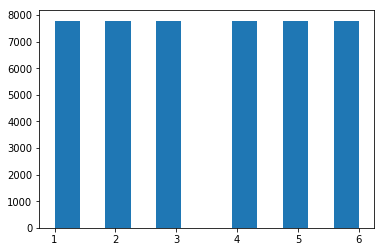

In [15]:
plt.hist(y_training, bins = 12)

(array([864.,   0., 864.,   0., 864.,   0.,   0., 864.,   0., 864.,   0.,
        864.]),
 array([1.        , 1.41666667, 1.83333333, 2.25      , 2.66666667,
        3.08333333, 3.5       , 3.91666667, 4.33333333, 4.75      ,
        5.16666667, 5.58333333, 6.        ]),
 <a list of 12 Patch objects>)

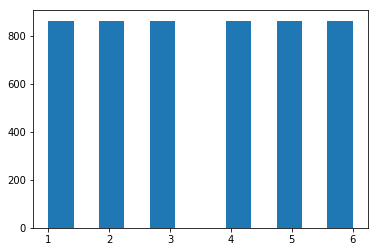

In [16]:
plt.hist(y_validation, bins=12)

### Re-shape training and validation sets

Transform into array of 32 x 124 grayscale "heatmap" images:

In [17]:
X_training[0].shape

(3968,)

In [18]:
X_training.shape

(46673, 3968)

In [19]:
X_training = np.reshape(X_training, (-1, electrodes, N, 1)) # no color
X_training.shape



(46673, 124, 32, 1)

In [20]:
print(X_validation.shape)
X_validation = np.reshape(X_validation, (-1, electrodes, N, 1,))
X_validation.shape

(5184, 3968)


(5184, 124, 32, 1)

### 1-Hot Encode Target Output Labels

In [21]:
import keras

num_classes = 6
y_training1hot = keras.utils.to_categorical(y_training - 1, num_classes) # We subtract 1 to convert to 0-index
y_validation1hot = keras.utils.to_categorical(y_validation - 1, num_classes)

print(y_training,y_training1hot,y_validation1hot)

Using TensorFlow backend.


[4 6 3 ... 5 2 4] [[0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]] [[1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]]


### CNN Model Definition and Training

In [22]:
from keras import *
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten ,MaxPooling2D
from keras.layers import Conv2D
from keras.utils import plot_model


model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=X_training.shape[1:], strides=1,kernel_regularizer=regularizers.l2(0.003)))
model.add(Activation('tanh'))

model.add(MaxPooling2D(pool_size=(2, 2),strides=2))


model.add(Conv2D(64, (3, 3), input_shape=X_training.shape[1:], strides=1,kernel_regularizer=regularizers.l2(0.003)))
model.add(Activation('tanh'))

model.add(MaxPooling2D(pool_size=(2, 2),strides=2))


model.add(Conv2D(128, (3, 3), input_shape=X_training.shape[1:], strides=1,kernel_regularizer=regularizers.l2(0.003)))
model.add(Activation('tanh'))

model.add(Dropout(0.15))


model.add(Dense(36,kernel_regularizer=regularizers.l2(0.003)))
model.add(Activation('tanh'))

model.add(Flatten())


model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

plot_model(model, show_shapes=True,show_layer_names=True,to_file='/content/drive/My Drive/major_project/model.png')
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 122, 30, 32)       320       
_________________________________________________________________
activation_1 (Activation)    (None, 122, 30, 32)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 59, 13, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 59, 13, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxP

In [23]:
num_epoch = 12
history = model.fit(X_training, y_training1hot, 
                    epochs= num_epoch, 
                    validation_data = (X_validation, y_validation1hot), 
                    shuffle=False)

Instructions for updating:
Use tf.cast instead.
Train on 46673 samples, validate on 5184 samples
Epoch 1/12
46673/46673 [==============================] - 19s 410us/step - loss: 2.2935 - acc: 0.2234 - val_loss: 2.2281 - val_acc: 0.2452
Epoch 2/12
46673/46673 [==============================] - 14s 298us/step - loss: 2.1495 - acc: 0.2779 - val_loss: 2.1497 - val_acc: 0.2689
Epoch 3/12
46673/46673 [==============================] - 14s 300us/step - loss: 2.0134 - acc: 0.3294 - val_loss: 2.0816 - val_acc: 0.3125
Epoch 4/12
46673/46673 [==============================] - 14s 291us/step - loss: 1.9192 - acc: 0.3516 - val_loss: 2.0382 - val_acc: 0.3164
Epoch 5/12
46673/46673 [==============================] - 14s 289us/step - loss: 1.8607 - acc: 0.3596 - val_loss: 1.9986 - val_acc: 0.3189
Epoch 6/12
46673/46673 [==============================] - 14s 290us/step - loss: 1.8156 - acc: 0.3627 - val_loss: 1.9622 - val_acc: 0.3167
Epoch 7/12
46673/46673 [==============================] - 14s 300us/s

In [24]:
model.save_weights('/content/drive/My Drive/major_project/weights.hdf5')
!ls "/content/drive/My Drive/major_project/"

Datasets  model.png  project_new.ipynb	weights.hdf5


In [25]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


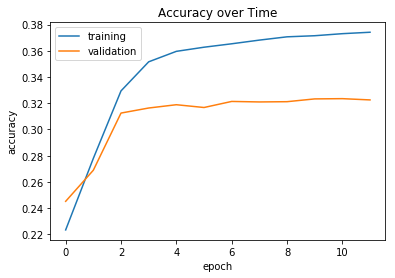

In [26]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy over Time')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

The accuracy of the holdout set (i.e, last test subject) holds steady at 25%, which is better than random guessing (1 out of 6 image categories == 16.67%), while the accuracy continues to improve for the training set (the first 9 test subjects) although it seems to converging to 90% or so.

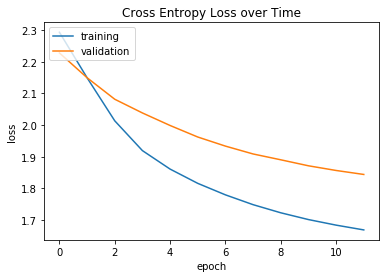

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Cross Entropy Loss over Time')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

However, the cross entropy loss of the validation set increases.



### Model Quality Check: Confusion Matrix

5184/5184 [==============================] - 1s 200us/step
Confusion matrix, without normalization
[[319 208  49  73  59 156]
 [ 89 609  10  11  29 116]
 [213 158 200  83  99 111]
 [259 277  47 203  23  55]
 [298 145  71 112 141  97]
 [234 169  63  67 131 200]]
SCORE:2


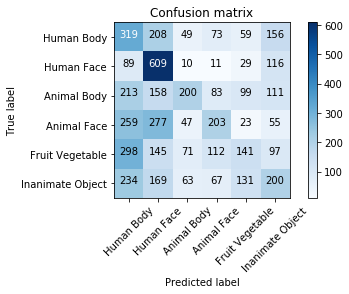

In [28]:
import itertools
from sklearn.metrics import confusion_matrix

y_validation_predictions = model.predict(X_validation, verbose=1)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cnf_matrix = confusion_matrix(y_validation - 1, np.argmax(y_validation_predictions, axis=1))

plt.figure()
class_names = ['Human Body', 'Human Face', 'Animal Body', 'Animal Face', 'Fruit Vegetable', 'Inanimate Object']
plot_confusion_matrix(cnf_matrix, classes=class_names)

#print(len(cnf_matrix))
count=0
i=0
for l in cnf_matrix:
  m=max(l)
  if m == l[i]:
    count=count+1
  i=i+1

print("SCORE:"+str(count))